In [61]:
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import sqlite3
import glob
from matplotlib import pyplot as plt
import numpy as np

In [62]:
def get_country(country):
    conn = sqlite3.connect("covid.db")
    df_all = pd.read_sql("select * from daily where Country like '{0}'".format(country),conn)
    conn.close()
    df_all=df_all.sort_values('Date')
    df_cntr=df_all[['Date','Confirmed','Deaths','Recovered']].fillna(0)
    df_cntr['Infected'] = df_cntr['Confirmed']-(df_cntr['Recovered']-df_cntr['Deaths'])
    return df_cntr
    

In [63]:
df = get_country('US')
df = df[df['Confirmed']>0]
df.head()

,Date,Confirmed,Deaths,Recovered,Infected
169,2020-01-22,1,0,0,1
170,2020-01-23,1,0,0,1
240,2020-01-24,2,0,0,2
239,2020-01-25,2,0,0,2
131,2020-01-26,5,0,0,5


In [64]:
X=df['Date'].values
y=df['Infected'].values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(X)
X=le.transform(X).reshape(-1, 1)
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4078.509032308584


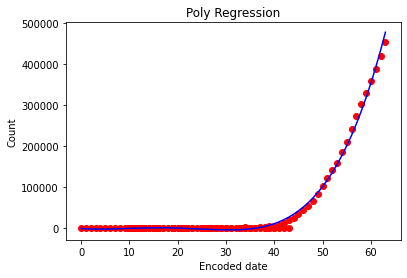

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

error = mean_squared_error(y, pol_reg.predict(poly_reg.fit_transform(X)), squared=False)
print(error)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    
    plt.title('Poly Regression')
    plt.xlabel('Encoded date')
    plt.ylabel('Count')
    plt.show()
    return
viz_polymonial()

In [66]:
X[-1]

array([63])

In [67]:
pol_reg.predict(poly_reg.fit_transform(np.array([X[-2],X[-1],X[-1]+1,X[-1]+2]).reshape(-1, 1)))

array([433019.02497442, 477261.75194658, 524675.48109681, 575403.31811735])

In [68]:
le.inverse_transform([X[-2],X[-1]])

/Users/hari/.pyenv/versions/3.6.5/envs/covid/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['2020-04-08', '2020-04-09'], dtype=object)